# SIMPLE LINEAR REGRESSION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.linalg as la 

## <font color = DarkGreen> EXAMPLE 1: NORMAL EQUATIONS

### QUESTION
Find the coefficients of regression $y = \beta_0 + \beta_1 x$ by forming and solving normal equations 

In [2]:
# Without using LinearRegression() find equation for regression line
# Eventhough x and y follows a non linear relation (from scatter plot) fit Linear regression to understand more on how codes works

$$
\begin{array}{|c|c|c|c|c|c|c|c|c|c|c|}
\hline
x & 2 & 10 & 20 & 30 & 40 & 50 & 60  & 70 & 80 & 90 & 100   \\
\hline
y & 408 & 272 & 196 & 137 & 90 & 78 & 51 & 40 & 30 & 22 & 15\\
\hline
\end{array}
$$

In [3]:
x = np.array([2, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
y = np.array([408, 272, 196, 137, 90, 78, 51, 40, 30, 22, 15])

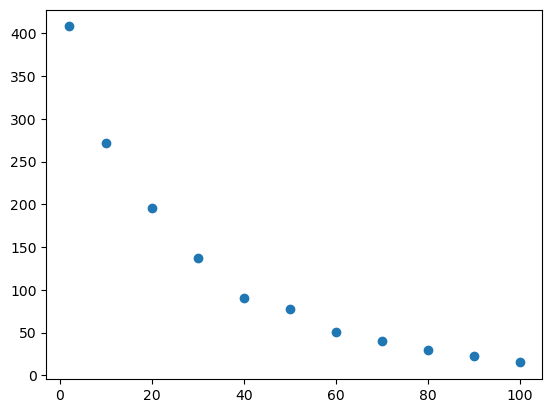

In [4]:
plt.scatter(x,y)

### To Form the normal equations

$Linear \ equation \ : y = \beta_0 + \beta_1 x $

$Normal \ Equation$
$$\sum y = n \beta_0 + \beta_1 \sum x$$
$$\sum yx = \beta_0 \sum x + \beta_1 \sum x^2$$

$ Where \ n = number \ of \ data \ points $

In [5]:
sum_x = np.sum(x)
sum_y =np.sum(y)

n = len(x)

xy = x*y
sum_xy = np.sum(xy)

sum_square_x = np.sum(x**2)


In [6]:
print('Sum X', sum_x)
print('Sum Y', sum_y)
print('Length of data',n)
print('Sum of X^2',sum_square_x)
print('Sum of xy', sum_xy)

Sum X 552
Sum Y 1339
Length of data 11
Sum of X^2 38504
Sum of xy 30806


$So \ normal \ equations \ are $

$$ 1339 = 11 \beta_0 + \beta_1 552$$
$$ 30806 = \beta_0 552 + \beta_1 38504$$

#### To solve normal equations

In [7]:
a = np.array([[11, 552], [552, 38504]]) # Coefficient matrix
b = np.array([1339, 30806])             # Constant matrix
coefficients = np.linalg.solve(a, b)

In [8]:
coefficients

array([290.74338607,  -3.36807472])

$So \ coefficients \ are \beta_0 = 290.74338607 and \beta_1 = -3.36807472$

Regression line is $$ y = 290.74338607 + (−3.36807472) x$$

#### Predicted y 

In [9]:
predicted_y = 290.74338607 - (3.36807472*x) 

In [10]:
predicted_y

array([284.00723663, 257.06263887, 223.38189167, 189.70114447,
       156.02039727, 122.33965007,  88.65890287,  54.97815567,
        21.29740847, -12.38333873, -46.06408593])

#### Error terms

In [11]:
error = y - predicted_y
error

array([123.99276337,  14.93736113, -27.38189167, -52.70114447,
       -66.02039727, -44.33965007, -37.65890287, -14.97815567,
         8.70259153,  34.38333873,  61.06408593])

#### Standardized error

In [12]:
standardized_error = (error - np.mean(error))/(np.std(error))

#### Plot of x vs error

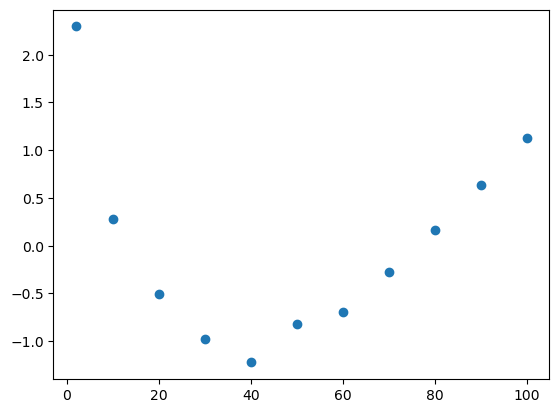

In [13]:
plt.scatter(x,standardized_error)

### $R^2 $ Value

In [14]:
total_variance = np.sum((y-np.mean(y))**2)

In [15]:
unexplained_variance = np.sum((y -predicted_y)**2) 

In [16]:
proportion_of_unexplained_variance = unexplained_variance/total_variance

$R^2$ is proportion of explained variance

In [17]:
r_square = 1 - proportion_of_unexplained_variance

In [18]:
print(r_square)

0.7925522314856495


Scatter plot of x vs standardized error and low $R^2$ shows the linear model $y = \beta_0 + \beta_1 x$ is a not a good fit

## Let us try create a function that do linear reression 

#### The following function gives coefficients of regression and $ R^2 $ value as output

In [19]:
# Let us combine above codes into a single function

In [20]:
# To fit y = beta_0 + beta_1 x
# beta_0 and beta_1 are regression coefficients we need to estimate through the function

def LinearRegression(x,y):
    
    # Ensure x and y are numpy arrays
    x = np.array(x)
    y = np.array(y)
    

    
    # Constants for normal equation
    sum_x = np.sum(x)
    sum_y =np.sum(y)

    n = len(x)

    sum_xy = np.sum(x*y)

    sum_x_square = np.sum(x**2)
    
    # Solving the normal equations to find coefficients
    a = np.array([[n, sum_x], [sum_x, sum_x_square]])
    b = np.array([sum_y, sum_xy])
    coefficients = np.linalg.solve(a, b)  # return in the order intercept and slope
    
    # Define predicted y
    predicted_y =  coefficients[0] +coefficients[1]*x  # line = intercept + slope (x)  i.e, y = beta_0 + beta_1 x
    
    # Error
    error = y - predicted_y
    
    # To Calculate R^2
    total_variance = np.sum((y-np.mean(y))**2)
    
    unexplained_variance = np.sum((y -predicted_y)**2)
    
    proportion_of_unexplained_variance = unexplained_variance/total_variance
    
    r_square = 1 - proportion_of_unexplained_variance
    
    return coefficients, r_square


In [21]:
x = np.array([2, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
y = np.array([408, 272, 196, 137, 90, 78, 51, 40, 30, 22, 15])

In [22]:
coef, square_r = LinearRegression(x,y)

In [23]:
print(coef)
print(square_r)

[290.74338607  -3.36807472]
0.7925522314856495


In [24]:
# New Data
X = [132.0,129.0,120.0,113.2,105.0,92.0,84.0,83.2,88.4,59.0,80.0,81.5,71.0,69.2]
Y = [46.0,48.0, 51.0,52.1,54.0,52.0,59.0,58.7,61.6,64.0,61.4,54.6,58.8,58.0]

In [25]:
coef, square_r = LinearRegression(X,Y)

In [26]:
print(coef)
print(square_r)

[75.21243193 -0.20938742]
0.7907602362991257


----
---

## <font color = DarkGreen> EXAMPLE 2 : MATRIX FORM

### QUESTION

For the below data find the coeffieceints of linear regression using matrix form.

- This is an example from Hands-On_Machine_Learning_with_Scikit-Learn-Keras-and-TensorFlow-2nd-Edition-Aurelien-Geron

In [27]:
# Randomly generated dataset

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

<AxesSubplot:>

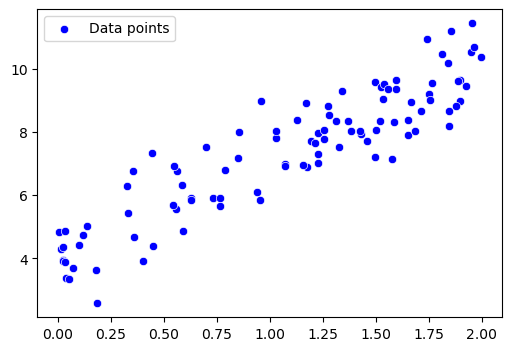

In [28]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=X.flatten(), y=y.flatten(), color='b', label='Data points')

### ANSWER

Let $y = \beta_0 + \beta_1 x $


Now predicted values corresponding to $x_i$ is $\hat{y_i} = \beta_0 1 + \beta_1 x_i$


Now if we have $N$ observations rewriting this 

$$\hat{y_1} = \beta_0 1 + \beta_1 x_1$$
$$\hat{y_2} = \beta_0 1 + \beta_1 x_2$$
$$\hat{y_3} = \beta_0 1 + \beta_1 x_3$$
$$.$$
$$.$$
$$.$$
$$\hat{y_N} = \beta_0 1 + \beta_1 x_N$$

Let us define the matrix form 

$$\beta = \begin{bmatrix}
\beta_0 & \beta_1 
\end{bmatrix}$$


$$X = \begin{bmatrix}
1 & x_1 \\
1 & x_2\\
1 & x_3\\
. & . \\
. & . \\
1 & x_N
\end{bmatrix}$$


and $$Y =  \begin{bmatrix}
\hat{y_1} \\
\hat{y_2}\\
.\\
.\\
\hat{y_N}
\end{bmatrix}$$

Then $$ Y = \beta X^T $$

We need to find $\beta$ such that minimise $\sum(y_i - \hat{y_i})$ gives minimum.

This gives estimate for matrix $\beta$ as  $$(X^TX)^{-1}X^TY$$

The above step is calculated by taking derivative with respect to $\beta$

So $$ Estimated \beta = (X^TX)^{-1}X^TY $$ is the matrix form of ordinary least square linear regression

#### Code for $Estimated \beta = (X^TX)^{-1}X^TY$ vector

In [29]:
# Update X
# We need to add a column with all elements equals to one
X = np.c_[np.ones((100, 1)), X]

In [30]:
X

array([[1.        , 0.02643719],
       [1.        , 0.76546949],
       [1.        , 0.5599497 ],
       [1.        , 0.10045297],
       [1.        , 1.58605941],
       [1.        , 0.96077773],
       [1.        , 1.84241427],
       [1.        , 1.46008406],
       [1.        , 1.65115785],
       [1.        , 0.56452654],
       [1.        , 1.19339079],
       [1.        , 1.66504399],
       [1.        , 1.74894075],
       [1.        , 1.89663613],
       [1.        , 1.32465736],
       [1.        , 0.13757349],
       [1.        , 0.44871686],
       [1.        , 1.22518232],
       [1.        , 0.85529441],
       [1.        , 0.03928352],
       [1.        , 0.7325507 ],
       [1.        , 0.40196597],
       [1.        , 1.38416733],
       [1.        , 0.361673  ],
       [1.        , 1.25667366],
       [1.        , 0.01533839],
       [1.        , 1.07097185],
       [1.        , 0.00433694],
       [1.        , 1.03055527],
       [1.        , 1.59496893],
       [1.

In [31]:
X.shape

(100, 2)

In [32]:
# Transpose of X
X_transpose = X.T

In [33]:
X_transpose.shape 

(2, 100)

In [34]:
#product of two matrices using numpy.dot(,)
# (X^T X)
np.dot(X_transpose,X)

array([[100.        , 108.15546293],
       [108.15546293, 154.97413426]])

Now  of $(X^T X)^{-1}$ using linalg module

In [35]:
la.inv(np.dot(X_transpose,X))

array([[ 0.04078471, -0.02846339],
       [-0.02846339,  0.02631711]])

Now $X^TY$

In [36]:
np.dot(X_transpose,y)

array([[736.39944453],
       [910.92507414]])

now $(X^T X)^{-1} X^TY$

In [37]:
beta = np.dot(la.inv(np.dot(X_transpose,X)),np.dot(X_transpose,y))

In [38]:
beta

array([[4.10582274],
       [3.01248926]])

$\beta_0$ is first since 1 matrix is first column in X 

In [39]:
print('Constant(intercept) term is ', beta[0])
print('Slope term is ', beta[1])

Constant(intercept) term is  [4.10582274]
Slope term is  [3.01248926]


The above calculated $\beta_0$ and  $\beta_1$ is consistent with stimulated formula $y = 4 + 3 * X + np.random.randn(100, 1)$

---------
----------

# MULTIPLE LINEAR REGRESSION 

## <font color = DarkGreen> EXAMPLE 2 : MATRIX FORM

In [40]:
data = [
    [30, 60, 175, 15, 26.2],
    [40, 60, 175, 15, 26.3],
    [30, 90, 175, 15, 39.8],
    [40, 90, 175, 15, 39.7],
    [30, 60, 225, 15, 38.6],
    [40, 60, 225, 15, 35.5],
    [30, 90, 225, 15, 48.8],
    [40, 90, 225, 15, 37.8],
    [30, 60, 175, 25, 26.6],
    [40, 60, 175, 25, 23.4],
    [30, 90, 175, 25, 38.6],
    [40, 90, 175, 25, 52.1],
    [30, 60, 225, 25, 39.5],
    [40, 60, 225, 25, 32.3],
    [30, 90, 225, 25, 43.0],
    [40, 90, 225, 25, 56.0],
    [25, 75, 200, 20, 35.2],
    [45, 75, 200, 20, 46.9],
    [35, 45, 200, 20, 22.7],
    [35, 105, 200, 20, 58.7],
    [35, 75, 150, 20, 34.5],
    [35, 75, 250, 20, 44.0],
    [35, 75, 200, 10, 35.7],
    [35, 75, 200, 30, 41.8],
    [35, 75, 200, 20, 36.5],
    [35, 75, 200, 20, 37.6],
    [35, 75, 200, 20, 40.3],
    [35, 75, 200, 20, 46.0],
    [35, 75, 200, 20, 27.8],
    [35, 75, 200, 20, 40.3]
       ]

df = pd.DataFrame(data, columns=[
    'Force', 'Power', 'Temperature', 'Time', 'Strength'])

df.head()

,Force,Power,Temperature,Time,Strength
0,30,60,175,15,26.2
1,40,60,175,15,26.3
2,30,90,175,15,39.8
3,40,90,175,15,39.7
4,30,60,225,15,38.6


In [41]:
X = df[['Force','Power','Temperature','Time']]
y = df[['Strength']]

In [42]:
# Convert the DataFrame to a NumPy array
X = X.to_numpy()
y = y.to_numpy()

In [43]:
X.shape

(30, 4)

In [44]:
X = np.c_[np.ones((30, 1)), X]

In [45]:
X.shape

(30, 5)

In [46]:
# Transpose of X
X_transpose = X.T

In [47]:
beta = np.dot(la.inv(np.dot(X_transpose,X)),np.dot(X_transpose,y))

In [48]:
beta

array([[-37.47666667],
       [  0.21166667],
       [  0.49833333],
       [  0.12966667],
       [  0.25833333]])

In [49]:
print("Constant term is", beta[0])
print('Coefficient for Force ', beta[1])
print("Coefficeint for Power ",beta[2])
print("Coefficeint for Temperature ",beta[3])
print("Coefficeint for Time ",beta[4])

Constant term is [-37.47666667]
Coefficient for Force  [0.21166667]
Coefficeint for Power  [0.49833333]
Coefficeint for Temperature  [0.12966667]
Coefficeint for Time  [0.25833333]


# <font color = DarkGreen> Let us try to define a function that take X and y as subdataframe and then gives the coefficients of regresssion 

In [52]:
# This will work only if the inverse of the matrix exists

def Linear_Regression_function(X,y):
    # Convert the DataFrame to a NumPy array
    X = X.to_numpy()
    y = y.to_numpy()
    
    # Number of raws
    raws = X.shape[0]
    
    # Adding the column with all elements equal to one for constant 
    X = np.c_[np.ones((raws, 1)), X]
    
    # Transpose of X
    X_transpose = X.T
    
    # Regression coefficient 
    beta = np.dot(la.inv(np.dot(X_transpose,X)),np.dot(X_transpose,y))
    
    
    return beta    

In [53]:
X = df[['Force','Power','Temperature','Time']]
y = df[['Strength']]

Linear_Regression_function(X,y)

array([[-37.47666667],
       [  0.21166667],
       [  0.49833333],
       [  0.12966667],
       [  0.25833333]])

#### <font color = DarkGReen> NOTE: The LinearRegression() function in Sklear uses Pseudoinverse (Moore-Penrose Pseudoinverse).
    
The pseudoinverse itself is computed using a standard matrix factorization technique
called Singular Value Decomposition (SVD)